**Independent Component Analysis (ICA)**

This project implements the Independent Component Analysis (ICA) algorithm to uncover hidden, statistically independent patterns in the Iris dataset, a classic real-world dataset used for data analysis and machine learning. Unlike PCA, which focuses on maximizing variance, ICA aims to separate data into independent, non-Gaussian components that reveal underlying signals or structures in the data. This makes ICA particularly powerful for identifying latent factors, reducing redundancy, and improving feature interpretability in complex datasets.

The workflow follows a structured pipeline that includes data exploration, preprocessing (scaling), ICA transformation, and visualization of the resulting independent components in 2D and 3D. By analyzing how the original features contribute to each independent component, this project highlights ICA’s strength in revealing hidden relationships and separable structures that traditional methods like PCA may not capture. The results showcase how ICA can serve as both a dimensionality reduction and feature extraction tool in unsupervised learning tasks.

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FastICA
sns.set(style="whitegrid", palette="muted")


In [3]:
# Load the dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [4]:
# Explore the datset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
# Check class distributions
df['species'].value_counts()


,count
species,
setosa,50
versicolor,50
virginica,50


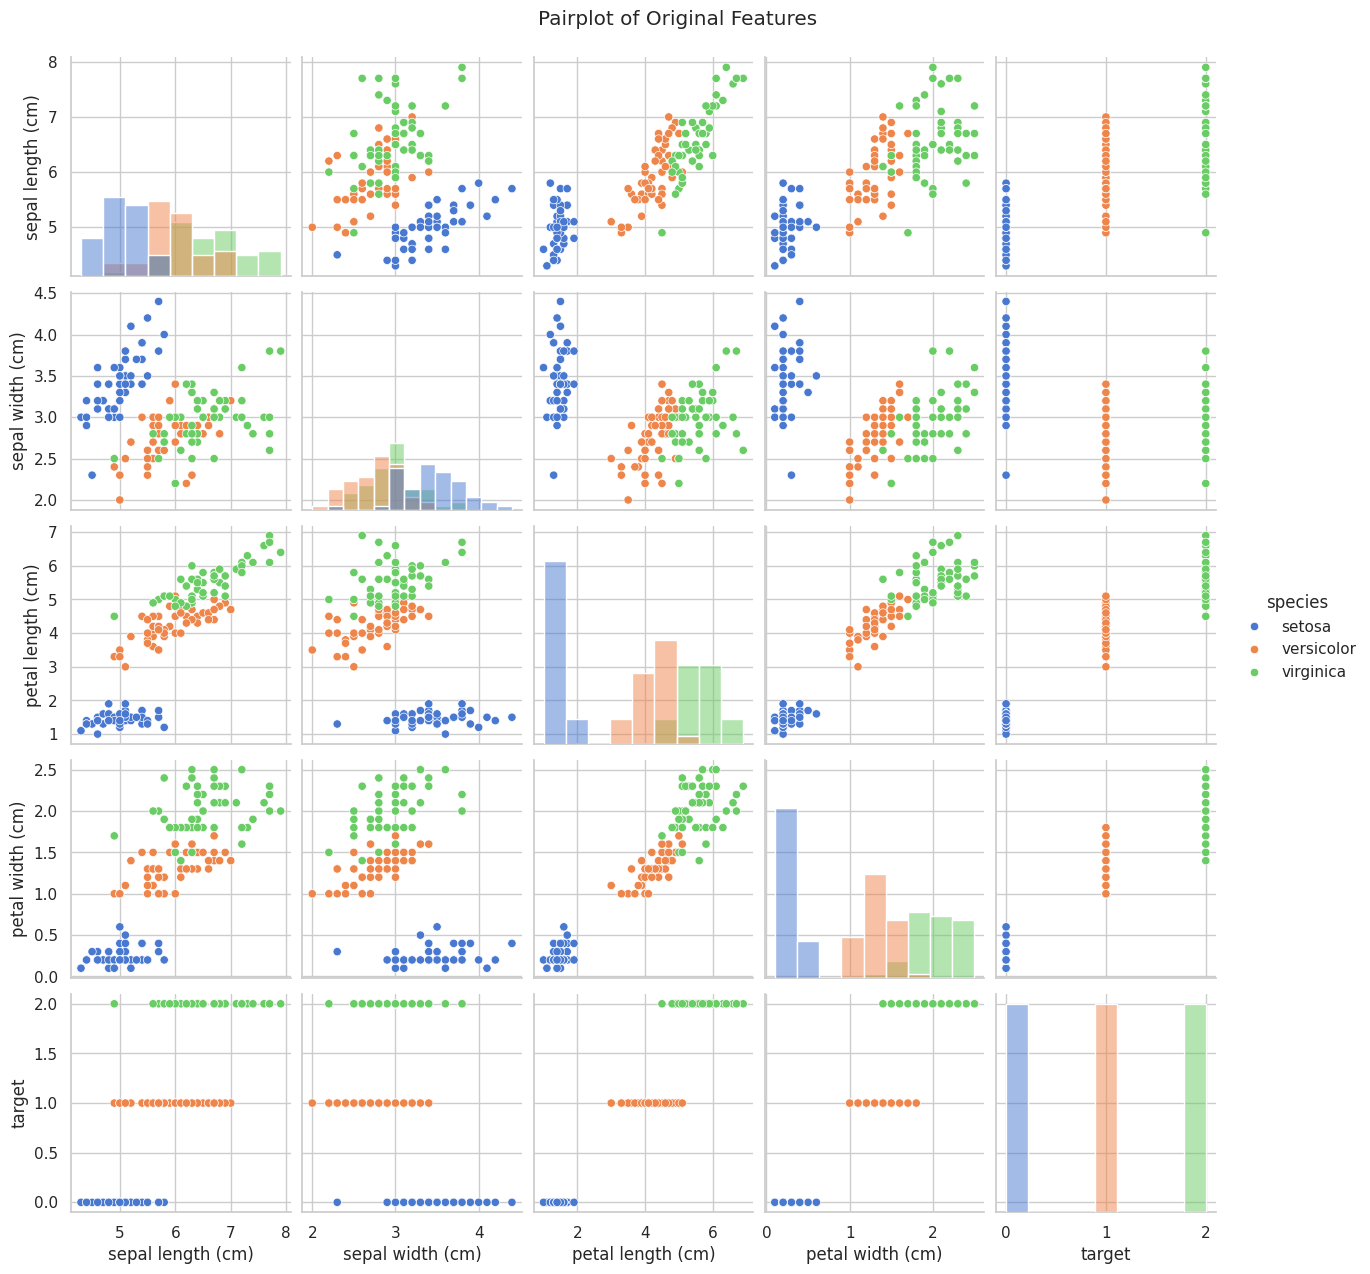

In [7]:
# Pairplot of origitnal features
sns.pairplot(df, hue='species', diag_kind='hist')
plt.suptitle("Pairplot of Original Features", y=1.02)
plt.show()


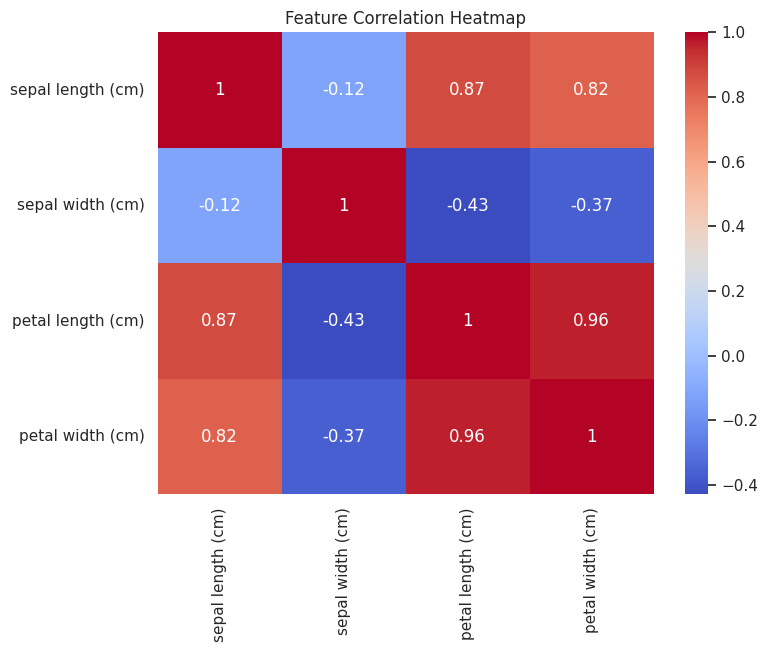

In [8]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.iloc[:, :4].corr(), cmap='coolwarm', annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()


In [9]:
# Data Preprocessing and scaling
X = df.drop(['target', 'species'], axis=1)
y = df['species']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [10]:
# Initialize ICA - extract 3 independent components
ica = FastICA(n_components=3, random_state=42)
X_ica = ica.fit_transform(X_scaled)

# Convert to DataFrame for visualization
ica_df = pd.DataFrame(X_ica, columns=['IC1', 'IC2', 'IC3'])
ica_df['species'] = y


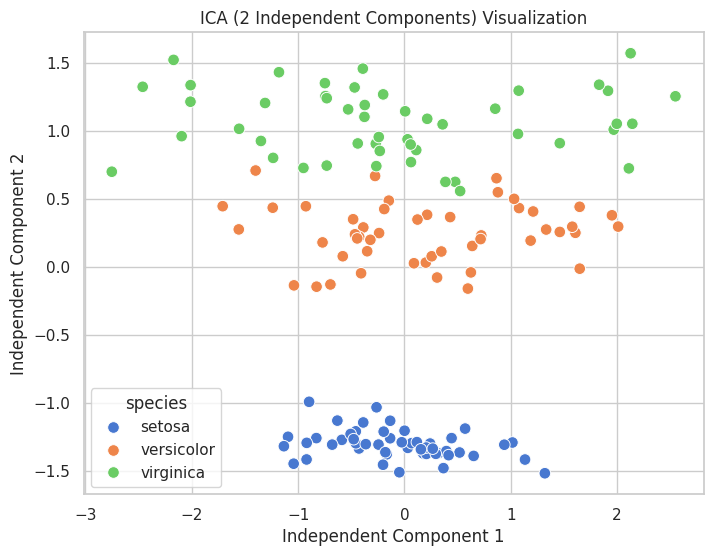

In [11]:
# Visualize ICA Component
plt.figure(figsize=(8,6))
sns.scatterplot(data=ica_df, x='IC1', y='IC2', hue='species', s=70)
plt.title("ICA (2 Independent Components) Visualization")
plt.xlabel("Independent Component 1")
plt.ylabel("Independent Component 2")
plt.show()


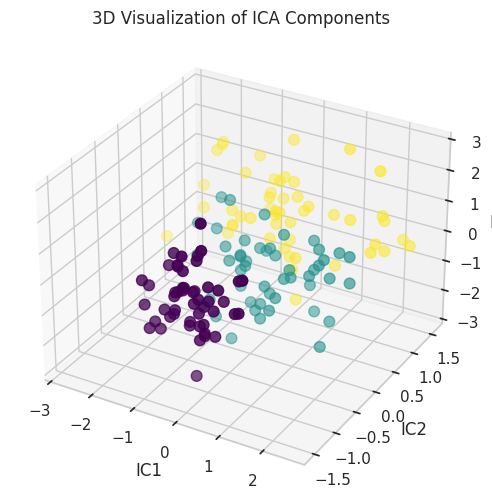

In [12]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ica_df['IC1'], ica_df['IC2'], ica_df['IC3'], c=df['target'], cmap='viridis', s=60)
ax.set_title("3D Visualization of ICA Components")
ax.set_xlabel("IC1")
ax.set_ylabel("IC2")
ax.set_zlabel("IC3")
plt.show()


In [13]:
# Check Mixing matrix
mixing_matrix = pd.DataFrame(ica.mixing_,
                             columns=['IC1', 'IC2', 'IC3'],
                             index=X.columns)
mixing_matrix


,IC1,IC2,IC3
sepal length (cm),0.493889,0.820247,0.286103
sepal width (cm),-0.010020,-0.448208,0.893696
petal length (cm),0.130831,0.984578,0.013557
petal width (cm),-0.048567,0.992007,0.088792


In [14]:
# Evaluate Reconstruction
# ICA can reconstruct the original signals — useful to check accuracy.
X_reconstructed = ica.inverse_transform(X_ica)
reconstruction_error = np.mean((X_scaled - X_reconstructed)**2)
print(f"Reconstruction Error: {reconstruction_error:.6f}")

Reconstruction Error: 0.005179


In [16]:
from joblib import dump

dump(ica, "ica_iris.joblib")
dump(scaler, "scaler_ica_iris.joblib")

print("Saved: ica_iris.joblib and scaler_iris.joblib")


Saved: ica_iris.joblib and scaler_iris.joblib


**Conclusion:-**

The Independent Component Analysis (ICA) successfully extracted statistically independent components from the Iris dataset, revealing hidden patterns and reducing feature correlation. The resulting 2D and 3D visualizations demonstrated clearer separation among species, highlighting ICA’s strength in uncovering underlying signals that are not easily captured by standard dimensionality reduction techniques like PCA.

This implementation shows that ICA is a powerful tool for feature extraction, exploratory data analysis, and preprocessing in unsupervised learning, especially when the goal is to identify independent sources or latent factors in complex datasets.